In [1]:
import cv2 as cv
cv.__version__

'4.8.0'

In [2]:
from PIL import Image
img=Image.open('111.jpg')

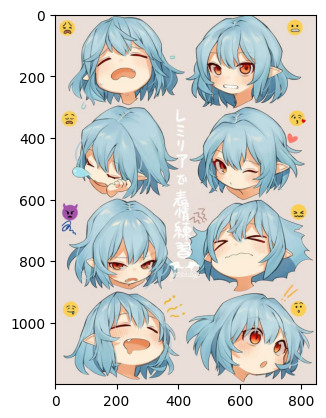

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('./111.jpg')
plt.figure("111")#创建窗口
plt.imshow(img)
plt.show()#展示窗口带有刻度

In [4]:
im=cv.imread('D://rc//23.8.17//target.png')


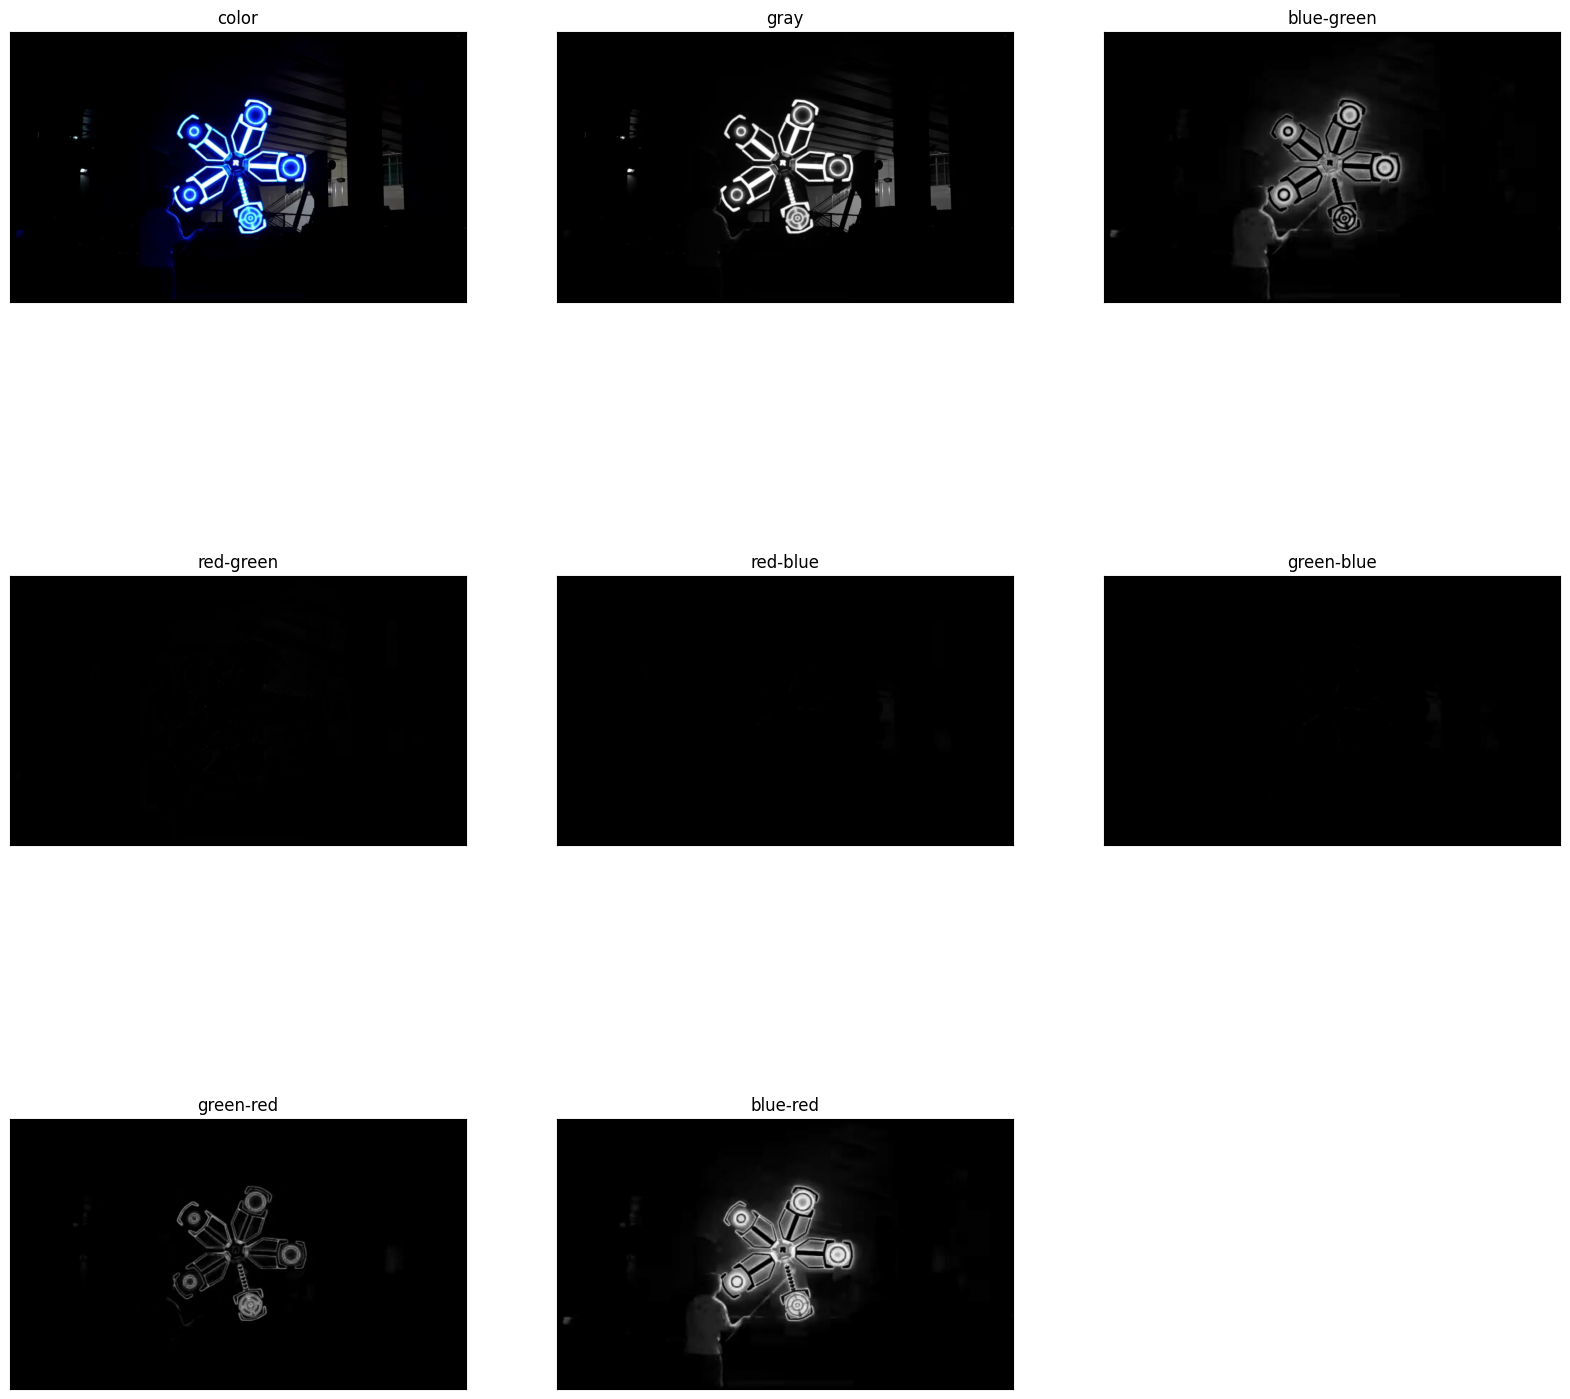

In [5]:
b=im[:,:,0]
g=im[:,:,1]
r=im[:,:,2]

#plot 1:

plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
plt.imshow(im)
plt.title("color")
plt.xticks([]), plt.yticks([])  # 隐藏 x 轴和 y 轴上的刻度值

#plot 2:
imgray=cv.cvtColor(im,cv.COLOR_RGB2GRAY)
plt.subplot(3, 3, 2)
plt.imshow(imgray,cmap='gray')
plt.title("gray")
plt.xticks([]), plt.yticks([])  # 隐藏 x 轴和 y 轴上的刻度值
#plot 3:


plt.subplot(3,3,3)#三个参数分别是行数，列数，序列数
bg=cv.subtract(b,g)
bg=cv.cvtColor(bg, cv.COLOR_BGR2RGB)
plt.imshow(bg)
plt.title("blue-green")
plt.xticks([]), plt.yticks([])
#plot 4:
plt.subplot(3,3,4)
rg=cv.subtract(r,g)
rg=cv.cvtColor(rg, cv.COLOR_BGR2RGB)
plt.imshow(rg)
plt.title("red-green")
plt.xticks([]), plt.yticks([])
#plot 5:
plt.subplot(3,3,5)
rb=cv.subtract(r,b)
rb=cv.cvtColor(rb, cv.COLOR_BGR2RGB)
plt.imshow(rb)
plt.title("red-blue")
plt.xticks([]), plt.yticks([])
#plot 6:
plt.subplot(3,3,6)
gb=cv.subtract(g,b)
gb=cv.cvtColor(gb, cv.COLOR_BGR2RGB)
plt.imshow(gb)
plt.title("green-blue")
plt.xticks([]), plt.yticks([])
#plot 7:
plt.subplot(3,3,7)
gr=cv.subtract(g,r)
gr=cv.cvtColor(gr, cv.COLOR_BGR2RGB)
plt.imshow(gr)
plt.title("green-red")
plt.xticks([]), plt.yticks([])
#plot 8:
plt.subplot(3,3,8)
br=cv.subtract(b,r)
plt.imshow(br,cmap='gray')
plt.title("blue-red")
plt.xticks([]), plt.yticks([])






plt.show()

**提取颜色通道**

(([], []), ([], []))

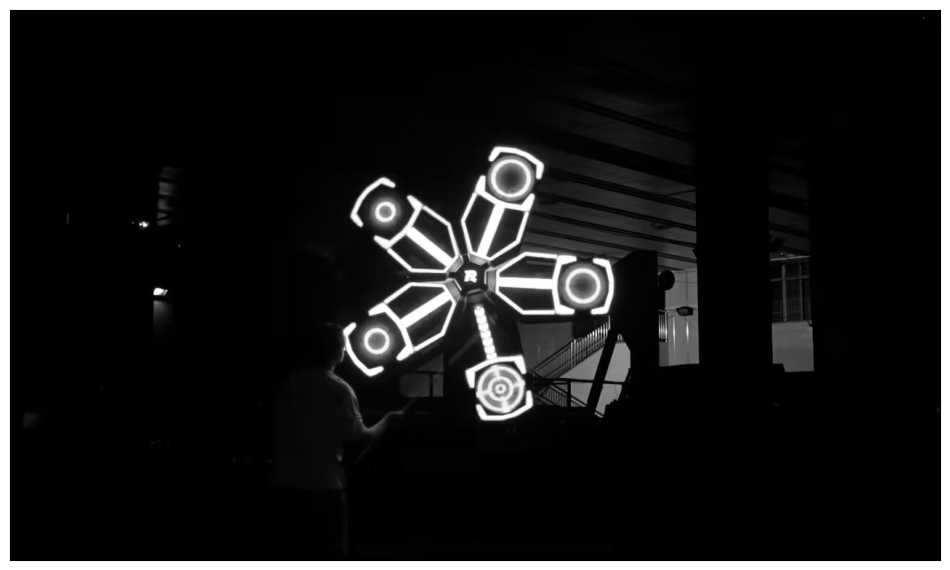

In [6]:
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
im=cv.imread('D://rc//23.8.17//target.png')
plt.figure(figsize=(12,10))
plt.subplot(1,1,1)
imgray=cv.imread('D://rc//23.8.17//target.png')
imgray=cv.cvtColor(imgray,cv.COLOR_RGB2GRAY)
plt.imshow(imgray,cmap='gray')
plt.xticks([]), plt.yticks([])


**图像阈值**
图像阈值很关键

(([], []), ([], []))

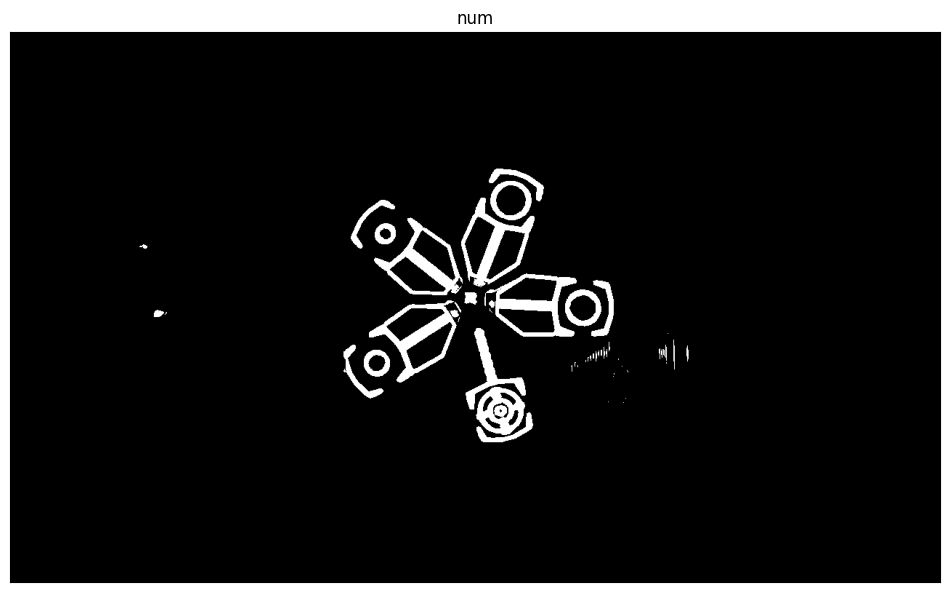

In [7]:
# 找到一个轮廓清晰的图像
ret,thresh=cv.threshold(imgray,150,255,cv.THRESH_BINARY)
plt.figure(figsize=(12,10))
plt.subplot(1,1,1)
#thresh=cv.cvtColor(thresh, cv.COLOR_BGR2RGB)
plt.imshow(thresh,cmap='gray')
plt.title("num")
plt.xticks([]), plt.yticks([])

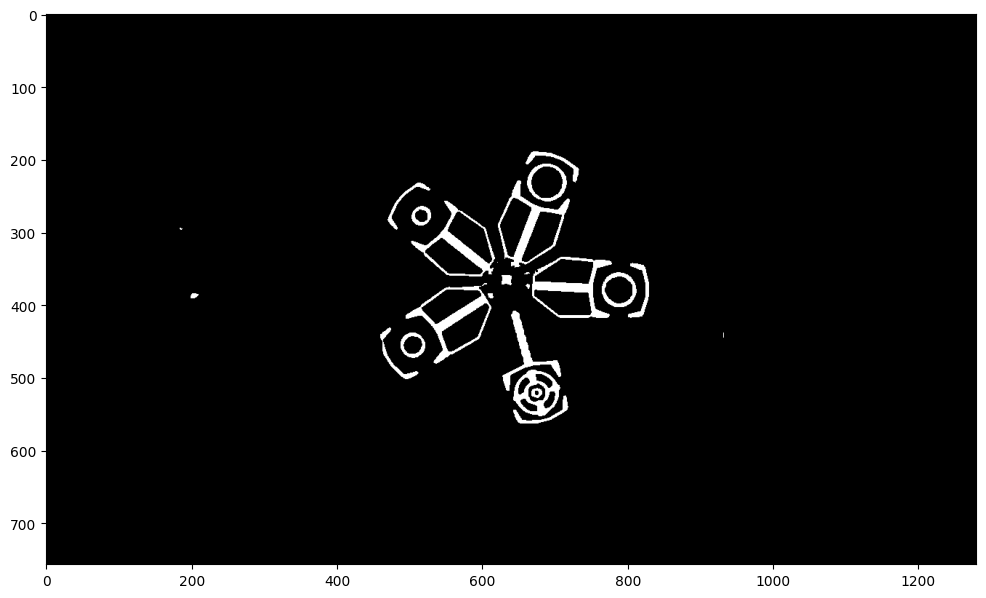

In [8]:
import numpy as np
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(thresh,kernel,iterations = 1)
plt.figure(figsize=(12,10))
plt.imshow(erosion,cmap='gray')
plt.show()

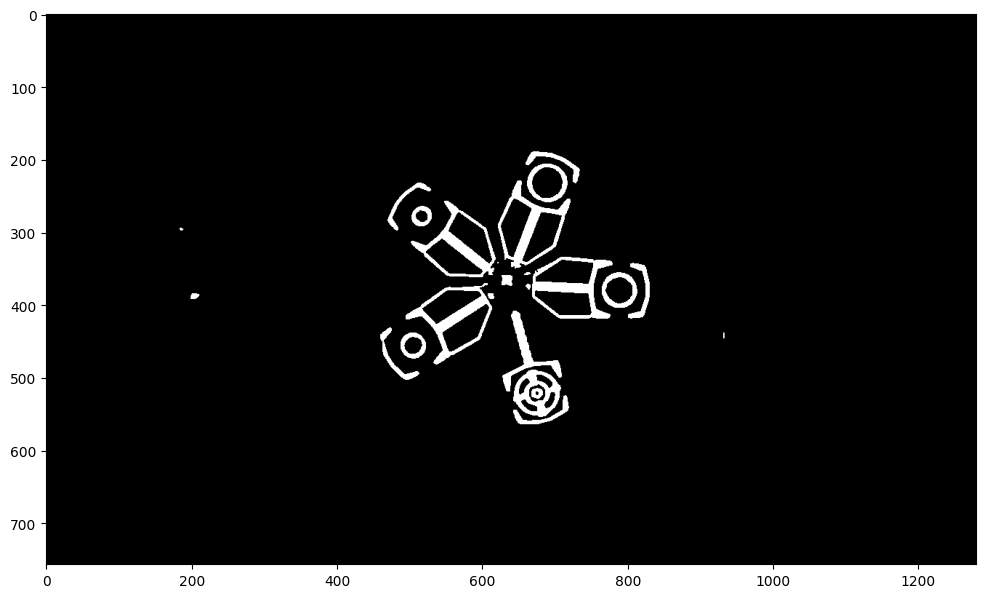

In [9]:
import numpy as np
kernel =np.ones((2,2),np.uint8)
dilation=cv.dilate(erosion,kernel,iterations=1)#扩张
plt.figure(figsize=(12,10))
plt.imshow(dilation,cmap='gray')
plt.show()

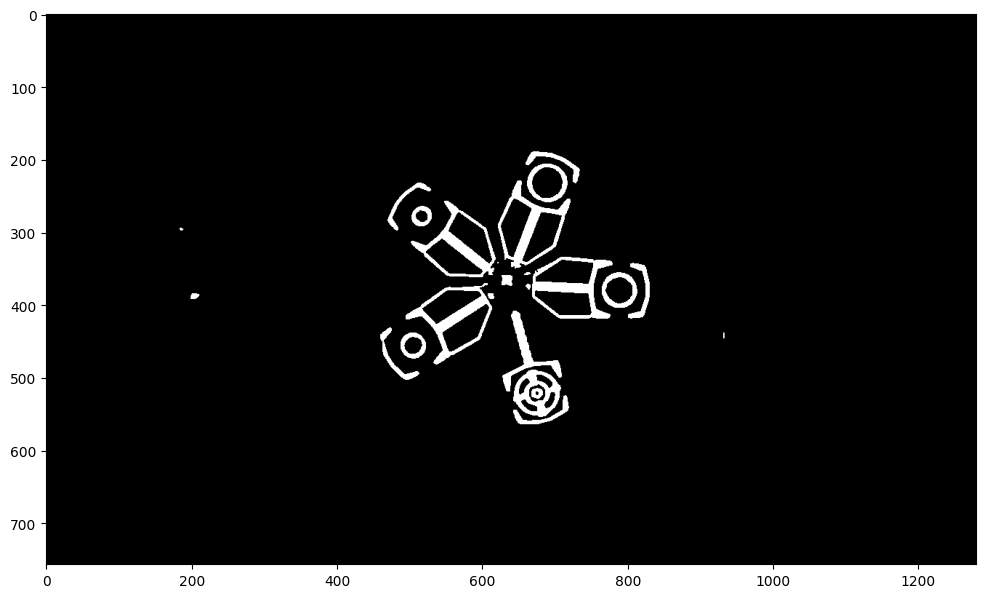

In [10]:
import numpy as np
kernel =np.ones((2,2),np.uint8)
dilation=cv.dilate(erosion,kernel,iterations=1)#扩张
plt.figure(figsize=(12,10))
plt.imshow(dilation,cmap='gray')
plt.show()

In [11]:
contour_img = im.copy()


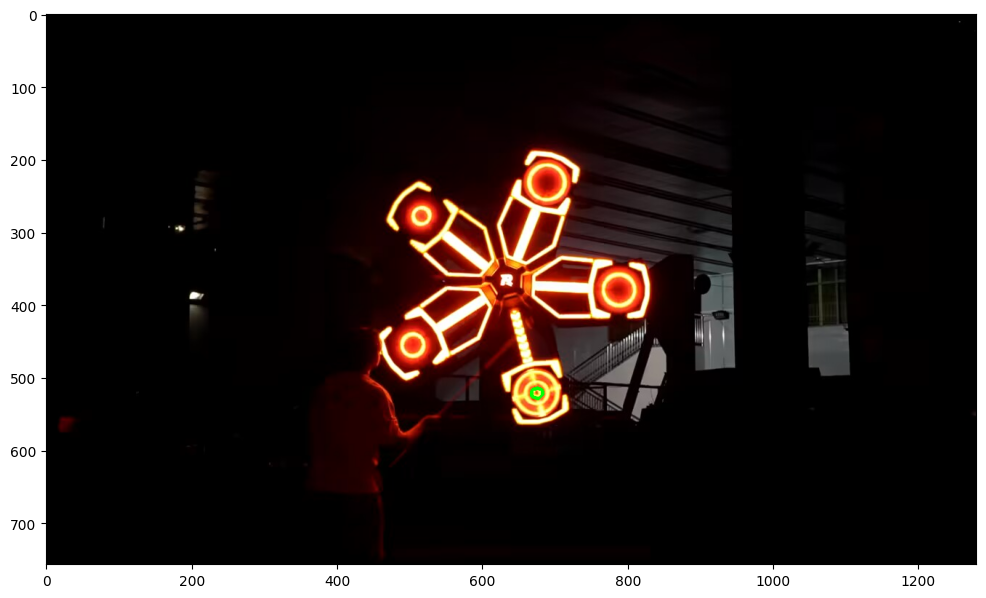

In [12]:
import cv2 as cv
contours, hierarchy = cv.findContours(dilation, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
filtered_contours = []
filtered_contours1 = []
# 筛选具有特定层次关系的轮廓

for i, contour in enumerate(contours):
    # 获取当前轮廓的层次结构信息
  current_hierarchy = hierarchy[0][i]
    
    #  根据特定层次关系筛选轮廓
  if current_hierarchy[3] != -1 and current_hierarchy[2] !=-1 :#筛选出有父级和子级的一个轮廓
    filtered_contours.append(contour)

for contour in filtered_contours:
    area = cv.contourArea(contour)
    if area<300 :
        filtered_contours1.append(contour)

#inner_contour_index = -1
#max_hierarchy_level = -1
#i=0
#hierarchy_entry=0
#for i, hierarchy_entry in enumerate(hierarchy[0]):
    # 获取当前轮廓的层次结构信息
#    current_hierarchy_level = hierarchy_entry[3]
    
    # 如果当前轮廓的层次等级更大，则更新最内侧轮廓的索引
#    if current_hierarchy_level > max_hierarchy_level:
#        max_hierarchy_level = current_hierarchy_level
#        inner_contour_index = i

# 获取最内侧的轮廓
#if inner_contour_index != -1:
 #   inner_contour = contours[inner_contour_index]


cv.drawContours(contour_img, filtered_contours1,-1, (0,255,0), 3)
plt.figure(figsize=(12,10))
plt.imshow(contour_img)
plt.show()
